In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('titanic_dataset.csv')

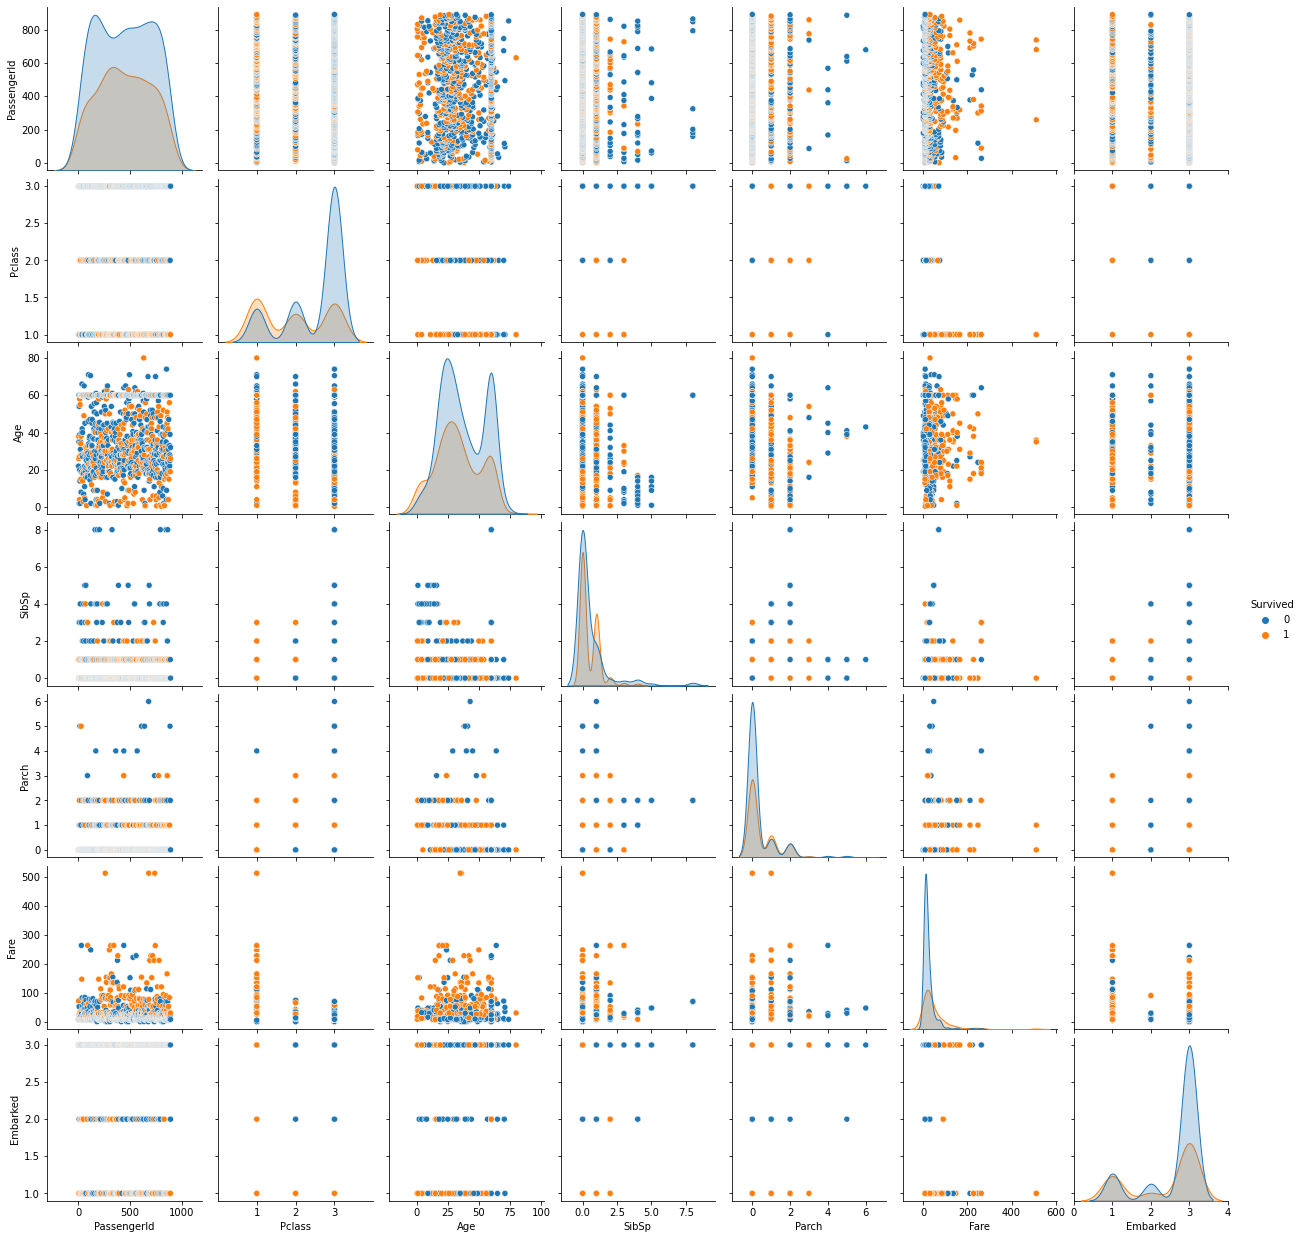

In [3]:
# Visualize pair plots
sns.pairplot(data, hue='Survived')
plt.show()

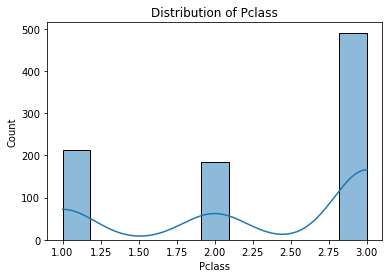

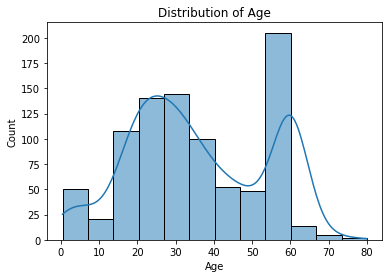

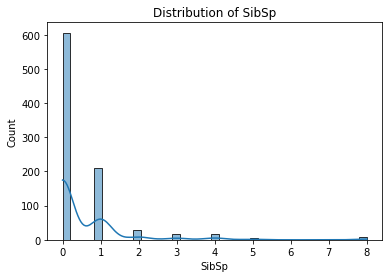

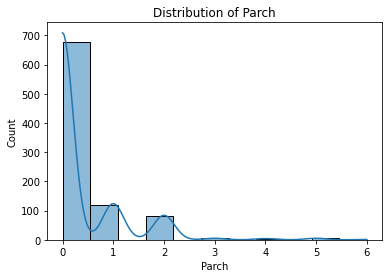

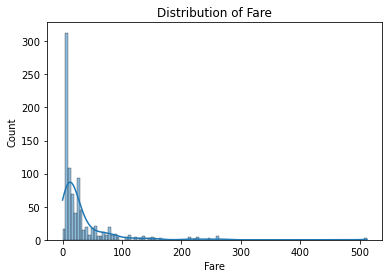

In [4]:
# Visualize distribution plots for each column
for column in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [7]:
# Drop unnecessary columns and handle missing values
data.drop(['PassengerId', 'Pclass', 'Parch', 'Embarked'], axis=1, inplace=True)
data.dropna(inplace=True)

In [8]:
# Convert categorical variables into dummy variables
data = pd.get_dummies(data, columns=['Sex', 'Fare'], drop_first=True)

In [9]:
# Split the dataset into features (X) and target variable (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

In [10]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [14]:
# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(report)

Accuracy: 79.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178

